# Histograms

Given data $x_1,...,x_n$ and "bins" $B_k = [u_{k-1}, u_k), k=1,...,m$, then 
$$hist(x)=\frac{1}{n(u_k-u_{k-1})}\sum^n \mathbb I(x_i \in B_k)$$
Note that $hist$ is a pdf since $hist(x)\geq 0$ and 
\begin{align*}
\int_{-\infty}^\infty hist(x)dx &= \sum^m \int_{B_k} hist(x)dx\\
&= n^{-1}\sum^n_{i=1}\sum_{k=1}^m \mathbb I(x_i \in B_k) \int_{B_k} \frac{1}{u_k - u_{k-1}}dx \\
&= 1
\end{align*}
Histogram depends on number of bins and boundaries of the bins. 

# Substitution principle estimation
Consider the empirical distribution function 
$$\hat F(x) = \frac{1}{n}\sum_{i=1}^n \mathbb I(X_i \leq x)$$
However, we cannot derive any $f$ since this is not differentiable. 

## Kernel Density estimation
Start with a density function $w(x)$, i.e. a __kernel__

Given $w$ and a __bandwidth__ $h$, define the kernel density estimator 
$$\hat f_h (x) = \frac{1}{nh}\sum^n w(\frac{x-xX_i}{h})$$
bandwidth controls the amount of smoothing, as $h$ increases, the estimator $\hat f_h(x)$ becomes smoother. 

Some examples of kernels are 
- Gaussian kernel $w(x) = \sqrt{2\pi}^{-1}\exp(\frac{-x^2}{2})$
- Epanechinkov kernel $w(x) = \frac{3}{4\sqrt 5}(1-\frac{x^2}{5}), |x|\leq \sqrt 5$
- Rectangular $w(x) = \frac{1}{2\sqrt{3}}, |x| \leq \sqrt 3$
- Triangular $w(x) = \frac{1}{\sqrt 6}(1-\frac{|x|}{\sqrt 6}), |x|\leq \sqrt 6$

## Example 
Draw 500 observations from 
$$f(x) = \begin{cases}
\sqrt{2\pi}^{-1}\exp(\frac{-(x-2)^2}{2})&k\leq 0.7 \\
\sqrt{2\pi}^{-1}\exp(\frac{-(x+2)^2}{2})&k > 0.7
\end{cases}$$

numeric(0)

numeric(0)

numeric(0)

numeric(0)

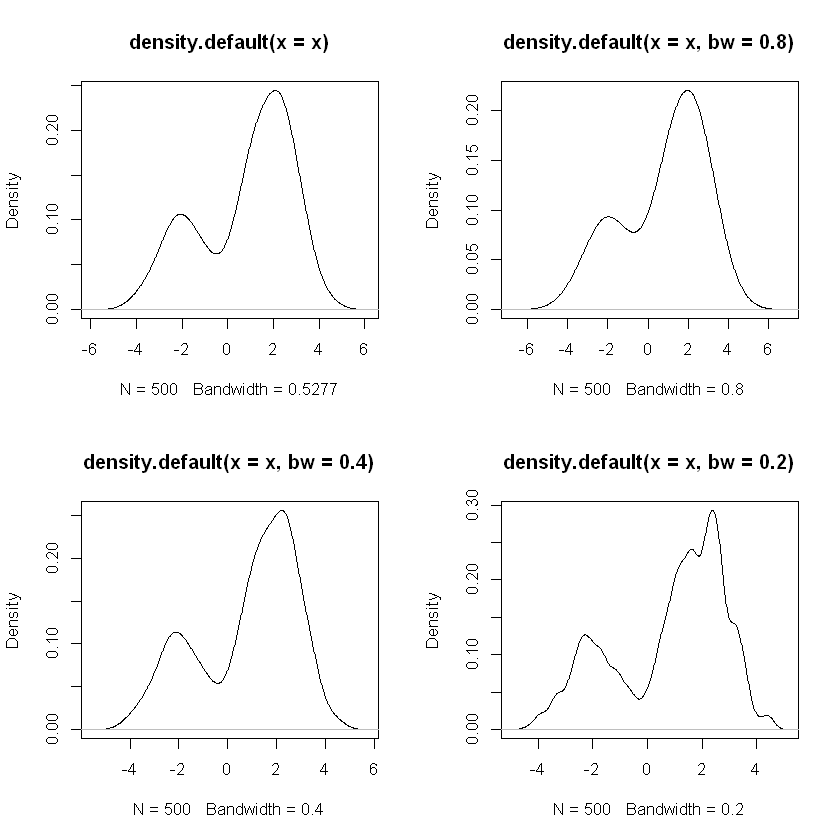

In [1]:
N <- 500
components <- sample(1:2,prob=c(.7, .3),size=N,replace=TRUE)
mus <- c(2, -2)

x <- rnorm(n=N,mean=mus[components],sd=1)
par(mfrow=c(2, 2))
.5387 - plot(density(x))
.8 - plot(density(x, bw=.8))
.4 - plot(density(x, bw=.4))
.2 - plot(density(x, bw=.2))

### Redistribution
The empirical distribution function $\hat F$ puts probability mass $1/n$ at each of the points $X_1,...,X_n$, use the kernel with bandwidth $h$ to redistribute this mass around each $X_i$, probability density around $X_i = \frac{1}{nh}w(\frac{x-X_i}{h})$ where 
$$\int_{-\infty}^\infty \frac{1}{nh}w(\frac{x-X_i}{h})dx = \frac{1}{n}\int_{-\infty}^\infty w(t)dt = \frac{1}{n}$$
The density estimate is now simply the sum of these densities over all observations 
$$\hat f_h(x) = \frac{1}{nh}\sum_{i=1}^n w(\frac{x-X_i}{h})$$

### Convolution 
Look at the distribution of $Y_h = U+hV$ where $U\sim \hat F$ and $V$ has density $w$ with $V,U$ independent. If $h$ is small then $Y_h \approx U \sim \hat F$. 

Unlike $U, Y_h$ is a continuous r.v. for each $h>0$: 
\begin{align*}
P(Y_h\leq x) &= \sum_{i=1}^n P(U+hV\leq x \mid U = X_i)\underset{=1/n}{P(U=X_i)}\\
&= \frac{1}{n}\sum_{i=1}^n P(hV\leq x-X_i) &U,V\text{ indep.}\\
&= \frac{1}{n}\sum_{i=1}^n P(V\leq \frac{x-X_i}{h})
\end{align*}

## Choice of bandwidth
The choice of $h$ depends on what we believe the underlying density looks like, if $f$ is believed to be smooth, then take larger $h$. If $f$ is believed to have a number of modes (i.e. local maxima) then we should take smaller $h$. 

Consider the bias-variance decomposition  
$$MSE(\hat{f_h}(x)) = E[(\hat{f_h}(x) - f(x))^2] = var(\hat{f_h}(x)) + \bigg[E[\hat{f_h}(x)] - f(x)\bigg]$$
As $h$ decreases, the squared bias term also decrease but the variance increases.  

### Example: The rectangular kernel

Take $w(x) = 1/2$ for $|x|\leq 1$. Then, 
$$\hat{f_h}(x) = \frac{1}{2nh}\sum_{i=1}^n \mathbb I(x-h\leq X_i \leq x+h)$$
The mean of $\hat{f_h}(x)$ is 
$$E[\hat{f_h}(x)] = \frac{F(x+h) - F(x-h)}{2h}\approx f(x) + \frac{h^2}6 f''(x)$$
the squared bias is 
$$\big[E[\hat{f_h}(x)]-f(x)\big]^2 \approx \frac{h^4}{36}[f''(x)]^2$$
For the variance, 
$$var[\hat{f_h}(x)] = \frac{1}{4h^2n}var[\mathbb I(x-h\leq X_i \leq x+h)]$$
Thus, we can approximate the variance by 
$$var[\hat{f_h}(x)]\approx \frac{f(x)}{2hn}$$
The MSE is approximately
$$MSE[\hat{f_h}(x)]\approx \frac{f(x)}{2hn} + \frac{h^4}{36}[f''(x)]^2$$

# Uncertainty Estimating 
Let $(X_1,..., X_n)\sim F_\theta$ for some $\theta \in \Theta \subset R$, want to estimate $\theta$ using $X_1,...,X_n$. 

Let $\hat\theta$ be the estimator of the true $\theta$, but we don't know what $\theta$ is, so how can we say about the estimation error?

### Example
Let $X_1,...,X_n$ indep. $N(\mu, \sigma^2)$ random variables. Estimate $\mu = E(X_i)$ by $\hat\mu = \bar X$ (substitution principle estimator).

We know that $\hat\mu \sim N(\mu, \sigma^2/n)$. Then 
$$P(|\hat\mu - \mu|\leq 1.96\frac{\sigma}{\sqrt n}) = 0.95$$
In this example, knowing the distribution of $\hat\mu$ tells us a lot about the uncertainty of $\hat\mu$ of an estimator of $\mu$.  
If $\sigma^2$ is unknown then we can estimate 
$$S^2 = \frac 1{n-1} \sum^n (X_i - \bar X)^2$$
and replace 1.96 by some $t$. 

__Sampling distribution__ of $\hat\theta$ is its probability distribution; this will depend on $\theta$. 

__Mean square error__ of $\hat\theta$ is defined as 
$$MES_\theta(\hat\theta) = E_\theta[(\hat\theta - \theta)^2] = var_\theta(\hat\theta) + [E_\theta(\hat\theta ) - \theta]^2$$

__Unbiased__ if $bias_\theta(\hat \theta) := E_\theta(\hat\theta) - \theta = 0$

#### Problem with unbiasedness
- In many problems, unbiased estimators do not exist
- In some problems, the estimator lies outside the parameter space with positive probability
- If $\hat\theta$ is an unbiased estimator of $\theta$ and $g$ is a non-linear function then $E_\theta[g(\hat\theta)] \neq g(\theta)$ unless $P_\theta(\hat\theta = \theta) = 1$. 

#### When to worry about bias?
- If $\hat\theta$ is systematically larger or smaller than $\theta$
- If the squared bias is approximately equal to or greater than the variance

### Example: Sample variance
$X_1,...,X_n$ indep. with $\mu, \sigma^2$, using unbiased estimator of sample variance 
$$S^2 = \frac1{n-1}\sum_{i=1}^n (X_i - \bar X)^2$$
However, $S = \sqrt{S^2}$ is biased, if we assume that $X_1,...,X_n$ are Normal then we can evaluate the bias explicitly
\begin{align*}
E(S) &= \sigma (\frac 2{n-1})^{1/2}\frac{\Gamma(n/2)}{\Gamma(\frac{n-1}2)}\\
&= \sigma \bigg[1-\frac1{4n} - \frac 7{32n^2}\bigg]\\
E(S) - \sigma &\approx -\frac\sigma{4n} - \frac{7\sigma}{32n^2}
\end{align*}

Then
\begin{align*}
MSE(S) &= var(S) + [E(S)-\sigma]^2 \\
&= E(S^2) - [E(S)]^2 + [E(S)-\sigma]^2 \\
&\approx \frac{\sigma^2}{2n}  + (-\frac\sigma{4n})^2\\
&= \frac{\sigma^2}{2n} + \frac{\sigma^2}{16n^2}
\end{align*}

# Consistency
The sequence of estimators $\hat\theta_n$ is __consistent__ for $\theta$ if for each $\epsilon > 0$ and $\theta\in\Theta$, 
$$\lim_{n\rightarrow\infty}P_\theta(|\hat\theta_n - \theta| > \epsilon) = 0$$
a.k.a. $\hat\theta_n \rightarrow^p \theta$

Note that consistency is an aspirational property: 
 - if we have enough info. then we can estimate $\theta$ arbitrarily precisely. 
 - For a finite $n$, consistency isn't meaningful

## Sample means and functions thereof
$X_1,...,X_n$ indep. with mean $\mu$ and $\sigma^2$, then estimate $\mu$ by $\hat\mu_n = n^{-1}\sum_{i=1}^n X_i$  
By WLLN, $\hat\mu_n$ is a consistent estimator of $\mu$ (i.e. $\{\hat\mu_u\}$ is consistent). 

Likewise, if we want to estimate $\theta = g(\mu)$ where $g$ is a continuous function then $\hat\theta_n = g(\hat\mu_n)$ is a consistent estimator of $\theta$. 

We can also approximate the sampling distributions of $\hat\mu_n$ and $\hat\theta_n$ by normal distributions 
$$\hat\mu_n \sim N(\mu, \sigma^2/n), \hat\theta_n \sim N(\theta, [g'(\mu)]^2 \frac{\sigma^2}{n})$$

### Example: Regression design
$$Y_i = \beta_0 + \beta_1x_i + \epsilon_i, i = 1,..,n$$
Assume for simplicity that $\epsilon_1,...,\epsilon_n$ are indep. $N(0,\sigma^2)$  
Least squares estimator of $\beta_1$:
$$\hat\beta_1 = \bigg[\sum_{i=1}^n (x_i - \bar x)Y_i\bigg]/\bigg[\sum_{i=1}^n (x_i - \bar x)^2\bigg]\sim N(\beta_1, \frac{\sigma^2}{\sum^n (x_i - \bar x)^2})$$
Thus $\hat\beta_1 = \hat\beta_1^{(n)}$ will be consistent provided that 
$$\sum^n (x_i - \bar x)^2 \rightarrow \infty$$


## Sampling distributions and standard errors
Assume $\hat\theta$ is an estimator of some parameter $\theta$, then $se(\hat\theta)$ is defined to be the standard deviation of the sampling deviation of the sampling distribution of $\hat\theta$.   
This is rarely known exactly but can usually be approximated somehow. 

If $\hat\mu = \bar X$ where $\bar X$ is based on $n$ indep. observations with variance $\sigma^2$ then $se(\hat\mu) = \sigma/\sqrt n$. 

If the sampling distribution is approximately normal then we can approximate the standard error by the standard deviation of the approximating normal distribution. 

### Example
$\hat\mu = \bar X, se(\hat\mu) = \sigma/\sqrt n$. estimated standard error is 
$$\hat{se}(\hat\mu) = \frac{S}{\sqrt n}, S^2 = (n-1)^2\sum^n (X_i -\hat X)^2$$

## Example: the Delta Method estimator
$X_1,...,X_n$ indep. with some unknown cdf $F$, suppose $\hat\theta = g(\bar X)$.  
If $g$ is differentiable then we can approximate the sampling distribution of $\hat\theta$ by a normal distribution using Delta Method: 
$$\hat\theta = g(\bar X)\sim N(g(\mu)=\theta, [g'(\mu)]^2 \frac{\sigma^2}{n})$$
where $\sigma^2 = var(X_i)$
This suggests that we can estimate $se(\hat\theta)$ using the Delta Method estimator 
$$\hat{se}(\hat\theta) = \frac{|g'(\bar X)|S}{\sqrt n}$$
where $S^2$ is the sample variance of $X_1,...,X_n$.   
We are using the substitution principle here to estimate the unknown $\mu$ and $\sigma^2$

Recall that the Delta Method follows from the Taylor series approximation
\begin{align*}
\hat\theta - \theta &= g(\bar X ) - g(\mu)\\
&\approx g'(\mu)(\bar X - \mu)\\
&= \frac1n\sum^n g'(\mu)(X_i - \mu)
\end{align*}
Thus 
$$\hat\theta \approx \frac1n \sum^n [g(\mu) + g'(\mu)(X_i - \mu)]$$
We "estimate" $\phi(X_i)$ by a __pseudo-value__ 
$$\phi_i = g(\bar X) + g'(\bar X)(X_i - \bar X), i=1,...,n$$
Note that 
$$\hat \theta = g(\bar X) = n^{-1} \sum^n \phi_i = \bar\phi$$
The Delta Method estimator can now be written as 
$$\hat{se}(\hat\theta) = \bigg[\frac1{n(n-1)}\sum^n(\phi_i - \bar\phi)^2\bigg]^{1/2} = \frac{|g'(\bar X)|S}{\sqrt n}$$

## Example: Trimmed mean
$X_1,...,X_n$ indep. continuous r.v. with density $f(x-\theta)$ where $f(x) = f(-x)$ and $\theta$ is unknown. if suspecting that $f$ is heavy-tailed, then we want to eliminate the effects of extreme observations.

To minimize the effect of extreme observations, we estimate $\theta$ by a __trimmed mean__: 
$$\hat\theta = \frac1{n-2r}\sum_{r+1}^{n-r}X_{(k)}$$
In general, the trimmed mean is a substitution principle estimator of 
$$\theta(F) = \frac1{1-2a}\int^{1-a}_a F^{-1}(\tau)d\tau$$
where $a = r/n$. 

Then, the sampling distribution of trimmed mean is approximately normal 
$$\hat\theta\sim N(\theta, \frac{v^2(F)}{n})$$
where 
$$v^2(F) = \frac1{(1-2a)^2}\int_a^{1-a}\int_a^{1-a}\frac{\min(s,t)-st}{f(F^{-1}(t))f(F^{-1}(s))}dsdt$$

# Approximating estimators by sample means
Suppose that $\hat\theta$ is some complicated estimator like a trimmed mean. 

How to compute $\hat{se}(\hat\theta)$, suppose that we can approximate $\hat\theta$ by an average $\hat\theta \approx n^{-1}\sum^n \phi(X_i)$  

This suggests using 
$$\hat{se}(\hat\theta) = \big\{\frac1{n(n-1)}\sum^n [\phi(X_i) - \bar\phi]^2\big\}^{1/2}$$
where $\bar\phi = \frac1n \sum^n \phi(X_i)\approx \hat\theta$

## Leave-one-out estimators
Suppose that $\hat\theta = \hat\theta(X_1,...,X_n)$, then define $\hat\theta_{-i} = \hat\theta(X_1,...,X_{i-1}, X_{i+1},...,X_n)$  
if $\hat\theta = \bar X$ then $\hat \theta_{-i} = \frac1{n-1}\sum_{j\neq i}X_j$

## Example: Theil Index
Define $\theta(F) = E_F[\frac{X_i}{\mu(F)}\ln (\frac{X_i}{\mu(F)})]$ where $P(X_i > 0) = 1$ and $\mu(F) = E_F(X_i)$.  

We estimate $\theta(F)$ by 
$$\hat\theta = n^{-1}\sum^n \frac{X_i}{\bar X}\ln(\frac{X_i}{\bar X})$$
The leave-one-out estimators are 
$$\hat\theta_{-i} = \frac1{n-1}\sum_{j\neq i}\frac{X_j}{\bar X_{-i}}\ln(\frac{X_j}{\bar X_{-i}})$$
where $\bar X_{-i} = \frac1{n-1}\sum_{j\neq i}X_j$

### From leave-one-out to pseudo-values
Suppose that we can approximate $\hat\theta$ by a sample mean
$$\hat\theta \approx \frac1n\sum^n \phi(X_i)$$
for some (unknown) function $\phi$. 

Then for the leave-one-out estimators, we have 
$$\hat\theta_{-i}\approx \frac1{n-1}\sum_{j\neq i}\phi(X_j)$$
This suggests that we can recover $\phi(X_i)$ (approximately) by the pseudo-value 
$$\Phi_i = n\hat\theta - (n-1)\hat\theta_{-i}\approx \phi(X_i)$$
The pseudo-values can be used to estimate the s.e. of $\hat\theta$. 

### Jackknife s.e. estimator
Given the pseudo-values $\Phi_1,...,\Phi_n$, define the jackknife estimator of $se(\hat\theta)$
$$\hat{se}(\hat\theta) = \big[\frac1{n(n-1)}\sum^n (\Phi_i - \bar\Phi)^2 \big]^{1/2} = \big[\frac{n-1}n\sum^n (\hat\theta_{-i} - \hat\theta_{\cdot})^2 \big]^{1/2}$$
where $\hat\theta_\cdot = \frac1n \sum^n \hat\theta_{-i}$  
For many estimators, we have 
$$E_\theta(\hat\theta) = \theta + \frac{a_1(\theta)}n + \frac{a_2(\theta)}n^2$$
We can use the jacknife to remove the $1/n$ bias term.  

Define the bias-corrected $\hat\theta$:
\begin{align*}
\hat\theta_{bc} &= n\hat\theta - (n-1)\hat\theta_\cdot\\
&= \hat\theta - (n-1)(\hat\theta_\cdot -\hat\theta)\\
&= n^{-1}\sum^n \Phi_i
\end{align*}
For $\hat\theta_{bc}$, then 
$$E_\theta(\hat\theta_{bc}) = \theta + \frac{a^*_2(\theta)}n^2 + \cdots$$

In [2]:
x <- rgamma(100,2)
y <- x/mean(x)
theil <- mean(y*log(y))
sprintf("theil index %f", theil)
# Compute pseudo-values
pseud <- NULL
for (i in 1:100) {
    xi <- x[-i]
    yi <- xi/mean(xi)
    loo <- mean(yi*log(yi))
    pseud <- c(pseud,100*theil - 99*loo)
}
sprintf("mean of pseudo %f", mean(pseud)) # mean of pseudo-values - bias-corrected estimate
sprintf("jackknife s.e. estimate %f", sqrt(var(pseud)/100))

[1] "theil index 0.188827"

[1] "mean of pseudo 0.190167"

[1] "jackknife s.e. estimate 0.022019"

## Delta Method vs. Jackknife
Sample 100 observations from a Gamma distribution with $\alpha = 2$ and $\lambda = 1$.  
Estimate $\theta = \ln(\mu) = g(\mu); g'(\mu) = 1/\mu$. 
For our sample $\bar x = 1.891$ and $s^2 = 1.911$, $\hat \theta = \ln(\bar x) = 0.637$ 

Thus the Delta Method s.e. estimate is 
$$\hat{se}(\hat\theta) = |g'(\bar x)|\frac s{\sqrt n} = \frac s{\bar x\sqrt n} = 0.0731$$
Computing the jackknife estimate is somewhat more computationally intensive. 

In [3]:
x <- rgamma(100,2)
thetaloo <- NULL
for (i in 1:100) {
    xi <- x[-i]
    thetaloo <- c(thetaloo,log(mean(xi)))
}
jackse <- sqrt(99*sum((thetaloo-mean(thetaloo))^2)/100)
sprintf("jackkniefe s.e. %f", jackse)

[1] "jackkniefe s.e. 0.070312"

## Example: The Lorenz curve
Suppose that $F$ is the cdf of a positive r.v. with finite mean $\mu(F)$, let $F$ describes the income distribution within some population.  

For each such $F$, we can define its __Lorenz curve__: 
$$\mathcal L_F(\tau) = \frac1{\mu(F)} \int_0^\tau F^{-1}(s)ds, 0\leq \tau\leq 1$$
a.k.a. the fraction of total income held by poorest $\tau$. 

$\mathcal L_F(\tau) \leq \tau$ with $\mathcal L_F(0) = 0$ and $\mathcal L_F(1)=1$.  
The difference between $\tau$ and $\mathcal L_F(\tau)$ can be used to measure income inequality. 

## Example: The Gini index
One measure of income inequality is the Gini index defined by 
$$Gini(F) = 2\int_0^1 (\tau - \mathcal L_F(\tau))d\tau = \frac{1}{\mu(F)}\int_0^1 (2\tau - 1)F^{-1}(\tau)d\tau$$
$Gini(F)\in [0,1]\Rightarrow 0$ perfect equality, $1$ perfect inequality. 

We estimate the quantiles $F^{-1}(\tau)$ by order statistics. Given indep. observations $X_1,...,X_n$ from $F$, we have 
$$\hat{Gini}(F) = \frac1{n\bar X} \sum^n (\frac{2k-1}{n}-1)X_{(k)}$$

In [4]:
gini <- function(x) {
    # compute point estimate
    n <- length(x)
    x <- sort(x)
    wt <- (2*c(1:n)-1)/n - 1
    g <- sum(wt*x)/sum(x)
    # compute leave-one-out estimates
    wt1 <- (2*c(1:(n-1))-1)/(n-1) - 1
    gi <- NULL
    for (i in 1:n) {
        x1 <- x[-i] # data with x[i] deleted
        gi <- c(gi,sum(wt1*x1)/sum(x1))
    }
    # compute jackknife std error estimate
    gbar <- mean(gi)
    se <- sqrt((n-1)*sum((gi-gbar)^2)/n)
    r <- list(gini=g,se=se)
}

# generate 500 observations from a Gamma( a = 1/2 )
x <- rgamma(500,1/2) # Sample from a Gamma with alpha=1/2
r <- gini(x)
sprintf("gini %f", r$gini)
sprintf("s.e. %f", r$se)

[1] "gini 0.626679"

[1] "s.e. 0.012652"

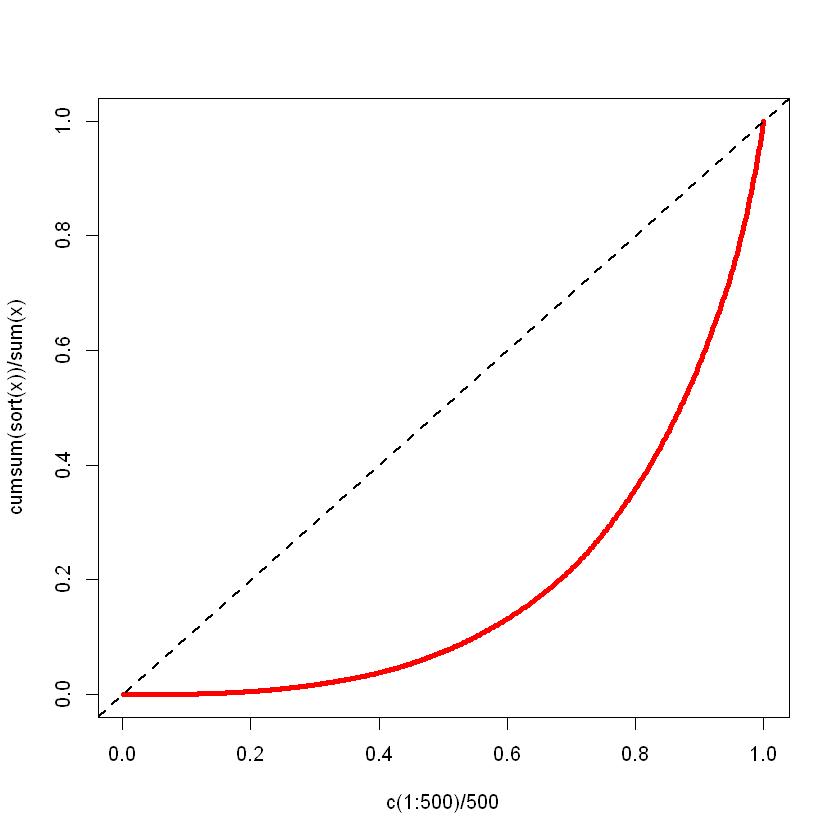

In [5]:
plot(c(1:500)/500,cumsum(sort(x))/sum(x),type="l",lwd=4,col="red")
abline(0,1,lty=2,lwd=2)